In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
file=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Assignment4Dataset.csv")
file.columns=['f1','f2','label']
file.head(5)
data=file[['f1','f2']]
data['f3']=data['f1']*data['f2']
label=file[['label']]
data.head()
print(label.shape)

(5299, 1)


In [3]:
data['f4'] = data['f1']**2
data['f5'] = data['f2']**2
data['f6'] = data['f1'] * data['f2']
data['f7'] = data['f1'] * data['f1']
data['f8'] = data['f2'] * data['f2']
data['f9'] = (data['f1'] * data['f2'] + 1)**2
data['f10'] = np.exp(-0.3*(data['f1'] - data['f2'])**2)

In [4]:
"""x=data.to_numpy()
y=label.to_numpy()
plt.scatter(x[:,0][y==-1],x[:,1][y==-1],s=3,c='r')
plt.scatter(x[:,0][y==1],x[:,1][y==1],s=3,c='b')"""

"x=data.to_numpy()\ny=label.to_numpy()\nplt.scatter(x[:,0][y==-1],x[:,1][y==-1],s=3,c='r')\nplt.scatter(x[:,0][y==1],x[:,1][y==1],s=3,c='b')"

In [17]:

x_train=data[0:400]
y_train=label[0:400]

x_test=data[400:]
y_test=label[400:]
print (f"X_train: {x_train.shape}, y_train: {y_train.shape}")

print (f"X_test: {x_test.shape}, y_test: {y_test.shape}")



X_train: (400, 10), y_train: (400, 1)
X_test: (4899, 10), y_test: (4899, 1)


standardising


In [6]:
"""def standard(data,n):
  colu=data.columns
  print (colu)
  for i in range (0,n):
    data[colu[i]]=(data[colu[i]]-np.mean(data[colu[i]]))/np.std(data[colu[i]])

  
  
  
  return data
  

"""


'def standard(data,n):\n  colu=data.columns\n  print (colu)\n  for i in range (0,n):\n    data[colu[i]]=(data[colu[i]]-np.mean(data[colu[i]]))/np.std(data[colu[i]])\n\n  \n  \n  \n  return data\n  \n\n'

In [ ]:
point=np.random.randint(0,399)
print(point)
w=np.random.randn(10,1)

x_train_point=x_train.iloc[[point]]
y_train_point=y_train.iloc[[point]]
y_pred=np.dot(x_train_point,w)


print(np.dot(x_train_point.transpose(),(y_train_point-y_pred)))
m=len(y_train)
lembda=10
gw=(-1/m)*np.dot(x_train_point.transpose(),(y_train_point-y_pred))+lembda*w
loss=(1/(2*m))*np.dot((y_train_point-y_pred).transpose(),(y_train_point-y_pred))+lembda*(np.dot(w.transpose(),w))/2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [45]:
w=np.random.randn(10,1)

y_pred=np.dot(x_train,w)
print(x_train.shape,w.shape,y_train.shape)
m=len(y_train)
lembda=10
loss=(1/(2*m))*np.dot((y_train-y_pred).transpose(),(y_train-y_pred))+lembda*(np.dot(w.transpose(),w))/2

print(loss.shape)


(400, 10) (10, 1) (400, 1)
(1, 1)


In [56]:
itr=0
m=len(y_train)
alpha=1e-2
lembda=0.8
w=np.random.randn(10,1)
wlist=[]
losslist=[]
itrlist=[]
while(itr!=1000):
   
  point=np.random.randint(0,399)
  
  
#fetching data of that random point
  x_train_point=x_train.iloc[[point]]
  y_train_point=y_train.iloc[[point]]
  y_pred_point=np.dot(x_train_point,w)


  
  
#calculating gradient wrt w  for that point  
  gw=(-1/m)*np.dot(x_train_point.transpose(),(y_train_point-y_pred_point))+lembda*w
  y_pred=np.dot(x_train,w)
  loss=(1/(2*m))*np.dot((y_train-y_pred).transpose(),(y_train-y_pred))+lembda*(np.dot(w.transpose(),w))/2  
  if itr==0:
    print(f"itr:{itr}, loss{loss}")
  if itr==999:
    print(f"itr:{itr}, loss{loss}")   
  w=w-alpha*gw
  wlist.append(w)
  itrlist.append(itr)
  losslist.append(loss[0][0])
  itr=itr+1
  

print(w)

itr:0, loss[[3.26974325]]
itr:999, loss[[0.00124844]]
[[-1.43498198e-06]
 [-3.93765969e-04]
 [ 2.01335436e-04]
 [-3.69923523e-04]
 [-1.27666753e-03]
 [ 9.62212313e-04]
 [-2.60600068e-04]
 [-6.88210214e-04]
 [ 1.58979461e-03]
 [ 5.89141238e-05]]


In [47]:
pred_train=np.dot(x_train,w)
pred_test =np.dot(x_test,w) 
print(pred_train.shape,pred_test.shape)

(400, 1) (4899, 1)


In [48]:
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse} test_MSE: {test_mse}")

train_MSE: label    0.998402
dtype: float64 test_MSE: label    0.998401
dtype: float64


In [52]:
"""plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(x_train["x2"], y_train, label="y_train")
plt.plot(x_train["x2"], pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")
"""

'plt.figure(figsize=(15,5))\n\n# Plot train data\nplt.subplot(1, 2, 1)\nplt.title("Train")\nplt.scatter(x_train["x2"], y_train, label="y_train")\nplt.plot(x_train["x2"], pred_train, color="red", linewidth=1, linestyle="-", label="model")\nplt.legend(loc="lower right")\n'

In [49]:
pred = np.dot(x_test, w)
sum=0
for i in range(len(pred)):
  if ((pred[i][0]*y_test.iloc[i][0]) >= 0):
    sum+=1
  

accuracy = sum/len(pred)
print("Accuracy =",accuracy*100)

Accuracy = 60.726678914064095


In [50]:
pred = np.dot(x_train, w)
sum=0
for i in range(len(pred)):
  if ((pred[i][0]*y_train.iloc[i][0]) >= 0):
    sum+=1
  

accuracy = sum/len(pred)
print("Accuracy =",accuracy*100)

Accuracy = 59.25


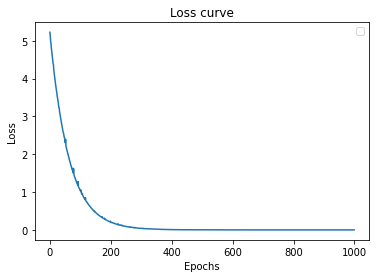

In [51]:
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")



plt.plot(itrlist, losslist)
plt.legend()
plt.show()